# 5. Exploración incial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

from sqlalchemy import create_engine
from sqlalchemy import text
from dateutil import parser


In [2]:
usuario     = "root"
contraseña  = "etl25"
host        = "localhost"
puerto      = "3306"
base_datos  = "workshop1_raw_db"

url = f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{base_datos}"
engine = create_engine(url)

# Leer todos los datos de la tabla
df = pd.read_sql("SELECT * FROM raw_candidates", con=engine)
print(df.shape)
df.head()


(50000, 11)


,id,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3.0,3.0
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2.0,10.0
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10.0,9.0
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7.0,1.0
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9.0,7.0


In [3]:
print("\nDataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
display(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         50000 non-null  int64  
 1   first_name                 50000 non-null  object 
 2   last_name                  50000 non-null  object 
 3   email                      50000 non-null  object 
 4   application_date           50000 non-null  object 
 5   country                    50000 non-null  object 
 6   years_of_experience        50000 non-null  int64  
 7   seniority                  50000 non-null  object 
 8   technology                 50000 non-null  object 
 9   code_challenge_score       50000 non-null  float64
 10  technical_interview_score  50000 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB

Descriptive Statistics:


,id,years_of_experience,code_challenge_score,technical_interview_score
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,15.286980,4.996400,5.003880
std,14433.901067,8.830652,3.166896,3.165082
min,1.000000,0.000000,0.000000,0.000000
25%,12500.750000,8.000000,2.000000,2.000000
50%,25000.500000,15.000000,5.000000,5.000000
75%,37500.250000,23.000000,8.000000,8.000000
max,50000.000000,30.000000,10.000000,10.000000


# 6. Datos nulos

In [4]:
# 1. Conteo de valores nulos por columna
missing_counts = df.isnull().sum()
print(" Missing Value Counts per Column:")
display(missing_counts[missing_counts > 0].sort_values(ascending=False))

# 2. Porcentaje de valores nulos por columna
total_rows = len(df)
missing_percentage = (df.isnull().sum() / total_rows) * 100
print("\n Missing Value Percentage per Column:")
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

 Missing Value Counts per Column:


Series([], dtype: int64)


 Missing Value Percentage per Column:


Series([], dtype: float64)

# 7. Correlaciones entre datos

Matriz de correlación:


,years_of_experience,code_challenge_score,technical_interview_score
years_of_experience,1.000000,0.005871,-0.005878
code_challenge_score,0.005871,1.000000,-0.002373
technical_interview_score,-0.005878,-0.002373,1.000000


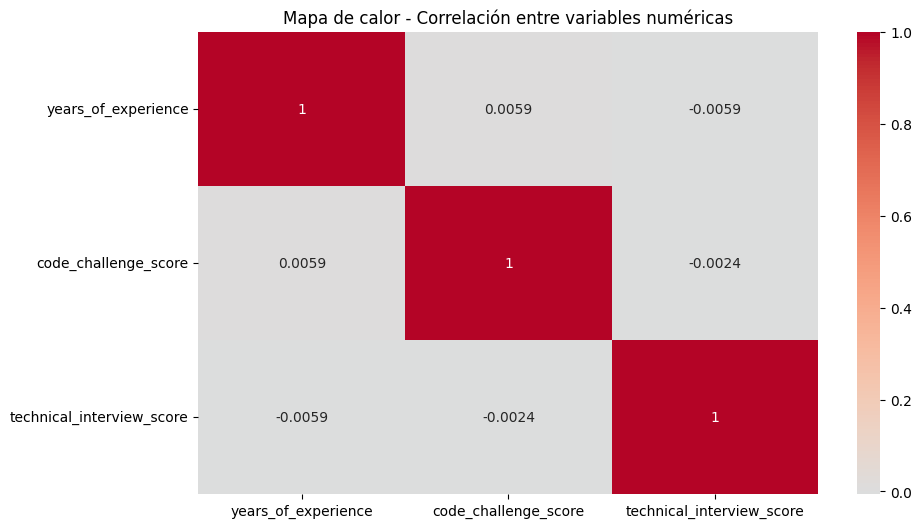

In [5]:
# 1. Excluir la columna 'id' del cálculo
corr_matrix = df.drop(columns=["id"]).corr(numeric_only=True)

# 2. Mostrar como tabla
print("Matriz de correlación:")
display(corr_matrix)

# 3. Visualizar con un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor - Correlación entre variables numéricas")
plt.show()

years_of_experience ↔ code_challenge_score (0.0058) → prácticamente sin relación.

years_of_experience ↔ technical_interview_score (-0.0058) → correlación nula y negativa muy débil.

code_challenge_score ↔ technical_interview_score (-0.0023) → también sin relación significativa.

# 8. Outliers

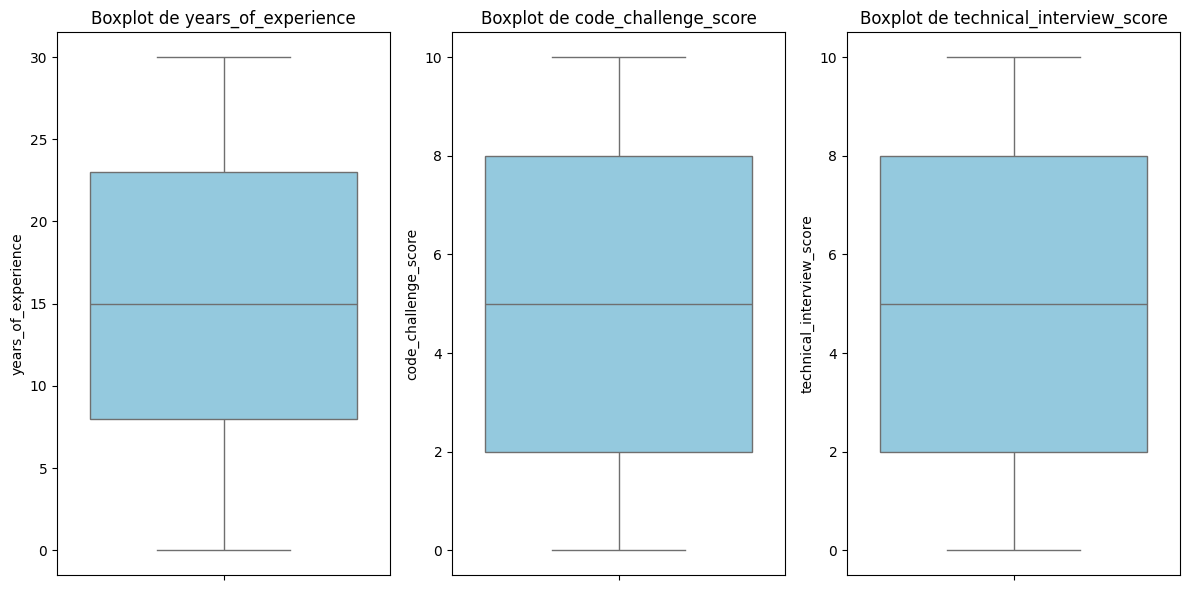

In [6]:
# Variables numéricas que vamos a analizar
numeric_cols = ["years_of_experience", "code_challenge_score", "technical_interview_score"]

# Boxplots para cada variable
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

años_de_experiencia  

Rango de 0 a 30 años.  

La mediana ≈ 15 indica que la mayoría de candidatos tienen una experiencia laboral intermedia, ni muy baja ni muy alta.  

Los cuartiles (Q1 ≈ 8, Q3 ≈ 23) muestran que un grupo importante tiene entre 8 y 23 años de experiencia, lo cual representa una base variada de candidatos en diferentes etapas de su carrera.  

No se detectan outliers, lo que sugiere que no hay casos anómalos de candidatos con experiencia exageradamente alta o baja.  

---

puntaje_reto_codigo  

Escala de 0 a 10.  

La mediana ≈ 5 indica un desempeño promedio en el reto técnico de código, mostrando que la mitad de los candidatos logra un puntaje cercano al estándar.  

Q1 ≈ 2 y Q3 ≈ 8 reflejan que la mayoría se mueve entre puntajes bajos y altos, lo cual da idea de que el reto diferencia bien entre candidatos con menos y más habilidades técnicas.  

No hay outliers, lo que significa que no existen puntajes extremadamente atípicos.  

---

puntaje_entrevista_tecnica  

También escala de 0 a 10.  

La mediana ≈ 5 indica que el desempeño en entrevistas técnicas se mantiene balanceado: hay tantos candidatos con resultados bajos como con resultados altos.  

Q1 ≈ 2 y Q3 ≈ 8 muestran que los candidatos tienden a dispersarse en un rango amplio, lo que refleja diversidad en preparación y nivel técnico.  

No hay valores extremos, lo que indica que los resultados de entrevistas fueron consistentes y sin evaluaciones fuera de lo común.  



# 9. Limpieza de datos

In [7]:
# 1. Crear una copia de trabajo
df_copy = df.copy()

# a. Normalización de datos y Capitalización

In [8]:
# 2. Función para limpiar espacios
def clean_spaces(x):
    if pd.isna(x):
        return x
    return " ".join(str(x).split())

# 3. Aplicar limpieza a columnas de texto
df["first_name"]  = df["first_name"].apply(clean_spaces)
df["last_name"]   = df["last_name"].apply(clean_spaces)
df["country"]     = df["country"].apply(clean_spaces)
df["technology"]  = df["technology"].apply(clean_spaces)

# 4. Capitalizar nombres y apellidos
df["first_name"] = df["first_name"].str.title()
df["last_name"]  = df["last_name"].str.title()

# 5. Normalizar país y tecnología (primera letra en mayúscula)
df["country"]    = df["country"].str.title()
df["technology"] = df["technology"].str.title()

# 6. Correos electrónicos → minúsculas
df["email"] = df["email"].str.lower()

print("Normalización completada en df")

# 7. Reemplazar contenido de la tabla en la DB
with engine.begin() as conn:
    conn.execute(text("TRUNCATE TABLE raw_candidates"))

df.to_sql("raw_candidates", con=engine, if_exists="append", index=False)

print("Datos limpios cargados en la tabla 'raw_candidates'")

Normalización completada en df
Datos limpios cargados en la tabla 'raw_candidates'


# b. Eliminación de duplicados por email

In [9]:
# 1. Contar correos duplicados
duplicados = df[df.duplicated(subset=["email"], keep=False)].sort_values("email")
print("Correos duplicados encontrados:", len(duplicados))
display(duplicados[["first_name", "last_name", "email"]].head(10))

# 2. Eliminar duplicados (dejando la primera aparición)
before = len(df)
df = df.drop_duplicates(subset=["email"], keep="first").reset_index(drop=True)
after = len(df)
eliminados = before - after


# 3. Reemplazar contenido de la tabla en la DB
with engine.begin() as conn:
    conn.execute(text("TRUNCATE TABLE raw_candidates"))

df.to_sql("raw_candidates", con=engine, if_exists="append", index=False)



print("Dataset después de eliminar duplicados:", df.shape)
print("Duplicados eliminados:", eliminados)


Correos duplicados encontrados: 332


,first_name,last_name,email
15823,Herta,Bartoletti,abbigail94@yahoo.com
31764,Gavin,Brakus,abbigail94@yahoo.com
21805,Jayce,Blick,addison_bode@hotmail.com
32069,Malika,Krajcik,addison_bode@hotmail.com
41691,Lorine,Howe,alberta95@gmail.com
2259,Nayeli,Kessler,alberta95@gmail.com
20574,Kamille,Legros,alberto11@yahoo.com
45066,Clint,Dickens,alberto11@yahoo.com
23841,Oswald,Batz,alejandra17@hotmail.com
49819,Kaylin,Hills,alejandra17@hotmail.com


Dataset después de eliminar duplicados: (49833, 11)
Duplicados eliminados: 167


# c. Parseo de fechas con múltiples formatos

In [10]:

# Función para detectar el formato de cada fecha
def detectar_formato(fecha):
    try:
        dt = parser.parse(str(fecha), dayfirst=True, yearfirst=False)
        # Si tiene "/" lo mostramos como dd/mm/YYYY, si no como YYYY-mm-dd
        return dt.strftime("%d/%m/%Y") if "/" in str(fecha) else dt.strftime("%Y-%m-%d")
    except Exception:
        return "Formato no reconocido"

# Ver formatos únicos en la columna 'application_date'
formatos_detectados = df["application_date"].dropna().apply(detectar_formato).unique()

print("Formatos encontrados en 'application_date':")
print(formatos_detectados)

df["application_date"] = pd.to_datetime(df["application_date"], errors="coerce")

print("\nDataFrame Info:")
df.info()

Formatos encontrados en 'application_date':
['2021-02-26' '2021-09-09' '2020-04-14' ... '2019-07-06' '2019-07-04'
 '2018-04-05']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49833 entries, 0 to 49832
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         49833 non-null  int64         
 1   first_name                 49833 non-null  object        
 2   last_name                  49833 non-null  object        
 3   email                      49833 non-null  object        
 4   application_date           49833 non-null  datetime64[ns]
 5   country                    49833 non-null  object        
 6   years_of_experience        49833 non-null  int64         
 7   seniority                  49833 non-null  object        
 8   technology                 49833 non-null  object        
 9   code_challenge_score       49833 non-null  floa

# d. Normalización de nombres de paises

In [11]:
#import warnings
warnings.filterwarnings("ignore", message="This pattern is interpreted")

patrones = {
    "USA": r"\b(USA|United States|U\.S\.A\.|U\.S\.|Estados Unidos|United States Of America|United States Minor Outlying Islands)\b",
    "Brazil": r"\b(Brazil|Brasil)\b",
    "Colombia": r"\b(Colombia|Columbia)\b",
    "Ecuador": r"\b(Ecuador)\b",
}

print("=== Variantes detectadas por país ===")
for pais, patron in patrones.items():
    variantes = df[df["country"].astype(str).str.contains(patron, case=False, na=False, regex=True)]["country"].value_counts()
    print(f"\n{pais}:")
    print(variantes)



=== Variantes detectadas por país ===

USA:
country
United States Minor Outlying Islands    220
United States Of America                188
Name: count, dtype: int64

Brazil:
country
Brazil    204
Name: count, dtype: int64

Colombia:
country
Colombia    226
Name: count, dtype: int64

Ecuador:
country
Ecuador    202
Name: count, dtype: int64


In [12]:
# Normalizar país: variantes → "USA"
variantes_usa = {
    "United States Of America",
    "United States Minor Outlying Islands",
}

mask_usa = df["country"].isin(variantes_usa)
cambios_usa = int(mask_usa.sum())


# Aplicar normalización
df.loc[mask_usa, "country"] = "USA"


with engine.begin() as conn:
    conn.execute(text("TRUNCATE TABLE raw_candidates"))

df.to_sql("raw_candidates", con=engine, if_exists="append", index=False)

print("\nResumen:")
print(f"- Registros normalizados a 'USA': {cambios_usa}")


Resumen:
- Registros normalizados a 'USA': 408


# e. Candidatos Contratados

In [13]:
# Regla: un candidato es contratado (HIRED) si ambos puntajes >= 7
df["hired"] = ((df["code_challenge_score"] >= 7) &
                (df["technical_interview_score"] >= 7)).astype(int)



# --- Asegurar columna 'hired' en MySQL (sin recrear tabla) --- 1 y 0 para que sql entienda
with engine.begin() as conn:
    exists = conn.execute(
        text("""
        SELECT 1
        FROM information_schema.COLUMNS
        WHERE TABLE_SCHEMA = :db AND TABLE_NAME = 'raw_candidates' AND COLUMN_NAME = 'hired'
        """),
        {"db": base_datos}
    ).scalar()
    if not exists:
        conn.execute(text("ALTER TABLE raw_candidates ADD COLUMN hired TINYINT(1) NOT NULL DEFAULT 0"))

# --- REEMPLAZAR CONTENIDO  y Reinicia el id también por eliminar filas duplicadas por correo (evita duplicados de PK)

with engine.begin() as conn:
    conn.execute(text("TRUNCATE TABLE raw_candidates"))

df.to_sql("raw_candidates", con=engine, if_exists="append", index=False)
print("Insertados:", len(df))


# Leer todos los datos de la tabla
df = pd.read_sql("SELECT * FROM raw_candidates", con=engine)
print(df.shape)
df.head()


Insertados: 49833
(49833, 12)


,id,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score,hired
0,1,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3.0,3.0,0
1,2,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2.0,10.0,0
2,3,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10.0,9.0,1
3,4,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,Qa Manual,7.0,1.0,0
4,5,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9.0,7.0,1


# 10. Estadísticas de limpieza

In [14]:
# Conteo de contratados vs no
counts = df["hired"].value_counts()
total = len(df)


percentages = (counts / total * 100).round(2)


print("Estadísticas de contratación:")
print(f"Contratados (1): {counts.get(1,0)}  → {percentages.get(1,0)}%")
print(f"No contratados (0): {counts.get(0,0)}  → {percentages.get(0,0)}%")

Estadísticas de contratación:
Contratados (1): 6678  → 13.4%
No contratados (0): 43155  → 86.6%


In [15]:
# Dataset original (crudo)
raw = pd.read_csv("../data/candidates.csv")


# Filas originales
orig_total = len(raw)

# Filas finales
final_total = len(df)

# Eliminados por duplicados
eliminados = orig_total - final_total

print("Resumen de limpieza:")
print(f"- Filas originales: {orig_total}")
print(f"- Eliminados por duplicados: {eliminados}")
print(f"- Filas finales (df limpio): {final_total}")

Resumen de limpieza:
- Filas originales: 50000
- Eliminados por duplicados: 167
- Filas finales (df limpio): 49833
